### Load required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


### From Bangalore data set, create separate data sets for population and their average income by neighborhoods.!

In [14]:
df = pd.read_csv('Bangalore_data.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df.head(10)

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [15]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [16]:
bangalore_population.to_csv('population_dataset.csv')

In [17]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [18]:
bangalore_income.to_csv('income_dataset.csv')

In [19]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [22]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

### Assign distinct color for each unique borough, and create dictionary of it.!

In [23]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [24]:
borough_colors

{'Central': '#703531',
 'Eastern': '#F0EE25',
 'NorthEastern': '#3A6A02',
 'Northern': '#6DCB27',
 'SouthEastern': '#79F1DE',
 'Southern': '#C9D83C',
 'SouthernSuburbs': '#17208E',
 'Western': '#A5CF3B'}

### create a map for Bangalore, and plot by boroughs.!

In [25]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [26]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [27]:
bangalore_map

### Capture nearby venues for each neighborhood by providing it's name, and geo coordinates, and create a data frame on it.!

In [28]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    #CLIENT_ID = 'I2ZN2Q2MFY5GFKYWQNMPWWDZ0FMFO2XDWA1BXFXUEZ3CR0G3'
    #CLIENT_SECRET = 'IQXCYPUPJB3TYWT4D14WC2N11Y1P2I1LE3EOGTOYPKKI3XN1'
    global CLIENT_ID, CLIENT_SECRET

    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [29]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

### Display total number of venues found in Bangalore.!

In [30]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  612


In [31]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


### Display count of venues by their category.!

In [32]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       115
Café                     30
Bakery                   29
Ice Cream Shop           23
Fast Food Restaurant     23
Department Store         21
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       16
Restaurant               13
Name: Neighborhood, dtype: int64

In [33]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  126


### Display count of unique venue categories in Bangalore.!

In [34]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [35]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     12
                Indiranagar                67
                Jeevanbheemanagar           5
                Malleswaram                 6
                Pete area                   4
                Rajajinagar                10
                Sadashivanagar             23
                Seshadripuram               9
                Shivajinagar               12
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  27
                CV Raman Nagar              7
                Hoodi                       3
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                8
                Varthur                     1
                Whitefield                 11
NorthEastern    Banaswadi                   8
                HBR Layout                  5
                Horamavu                    1
                Kammanahalli               10
                Lingarajapuram              1
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  12
                R. T. Nagar                 7
...                                       ...
                Yeshwanthpur                7
SouthEastern    BTM Layout                 35
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             4
                HSR Layout                  9
                Koramangala                 6
                Madiwala                   32
Southern        Banashankari               10
                Basavanagudi                9
                Girinagar                   3
                J. P. Nagar                25
                Jayanagar                  13
                Kumaraswamy Layout          8
                Padmanabhanagar             5
                Uttarahalli                12
SouthernSuburbs Arekere                    27
                Begur                       4
                Gottigere                   7
                Hulimavu                    8
                Kothnur                     5
Western         Basaveshwaranagar          22
                Kamakshipalya               2
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  8
                Nandini Layout              2
                Nayandahalli                4
                Rajarajeshwari Nagar        6
                Vijayanagar                 5

[62 rows x 1 columns]

In [36]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [37]:
individual_bangalore_venue_count.reset_index(inplace=True)

### Display count of venues by neighborhoods and by borough!

In [38]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,12
2,Central,Indiranagar,67
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,6
5,Central,Pete area,4
6,Central,Rajajinagar,10
7,Central,Sadashivanagar,23
8,Central,Seshadripuram,9
9,Central,Shivajinagar,12


### Create and display a bar chart and depict count of venues by neighborhood.!

[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

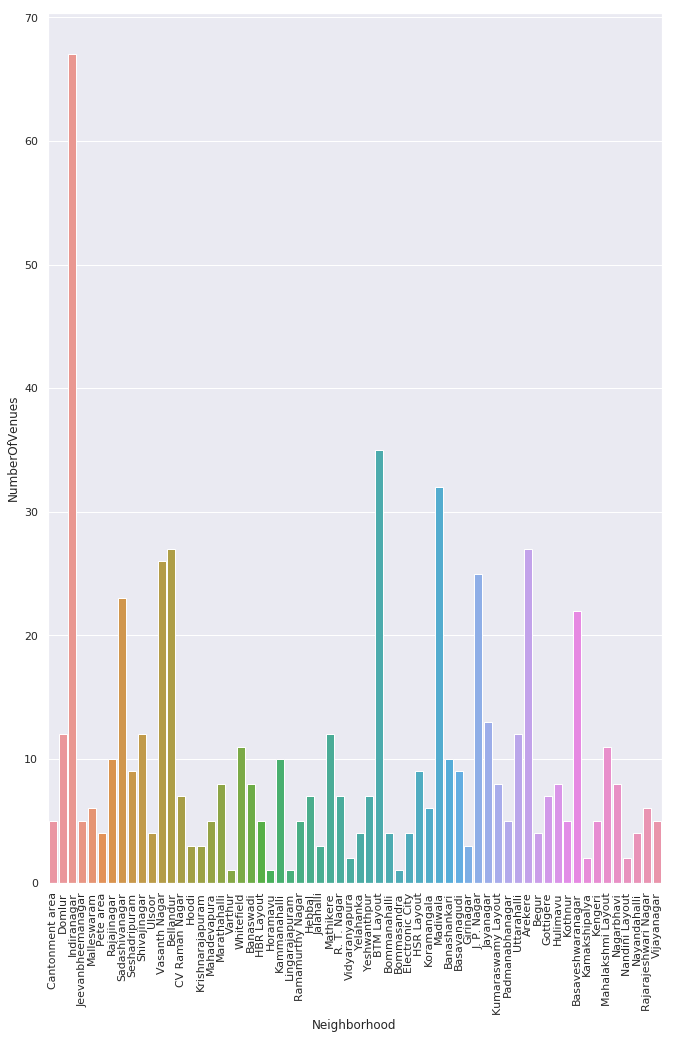

In [39]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

### Display list of venues for which neighborhood as Hebbal, from venues data frame.!

In [40]:
bangalore_venues[bangalore_venues['Neighborhood']=='Hebbal']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
278,Hebbal,Northern,13.0358,77.597,Domino's Pizza,13.035000,77.597000,Pizza Place
279,Hebbal,Northern,13.0358,77.597,CityPearl SuperMarket,13.035203,77.595675,Department Store
280,Hebbal,Northern,13.0358,77.597,CCD Express,13.034863,77.597633,Coffee Shop
281,Hebbal,Northern,13.0358,77.597,kabab studio - coraltree,13.034889,77.597477,Indian Restaurant
282,Hebbal,Northern,13.0358,77.597,Hindustan mess,13.034869,77.597626,Indian Restaurant
283,Hebbal,Northern,13.0358,77.597,BDA PARK,13.035112,77.594224,Park
284,Hebbal,Northern,13.0358,77.597,City Pearl,13.035154,77.594198,Market


### Create one-hot encoding for all venues in Bangalore.!

In [41]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [42]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create one-hot encoding for all venues group by neighborhoods in Bangalore.!

In [43]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0.00,0.000,0.000000,0.0,0.000000,0.037037,0.000000,0.000000,0.000,...,0.037037,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,BTM Layout,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.057143,0.000000,0.000000
2,Banashankari,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Banaswadi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.125000,0.000000,0.000000
4,Basavanagudi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Basaveshwaranagar,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Begur,0.25,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bellandur,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.037037,0.000000,0.00,0.00,0.037037,0.000000,0.000000,0.000000,0.000000
8,Bommanahalli,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommasandra,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


### Identify top 5 venues by their frequency and neighborhood.!

In [44]:
number_of_top_venues = 5

In [45]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.22
1  Venue Category_Sporting Goods Shop       0.15
2     Venue Category_Department Store       0.07
3   Venue Category_Mughlai Restaurant       0.04
4     Venue Category_Business Service       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.17
1      Venue Category_Ice Cream Shop       0.09
2         Venue Category_Snack Place       0.09
3  Venue Category_Chinese Restaurant       0.09
4      Venue Category_Sandwich Place       0.06


--------- Banashankari ---------
                                    Venue  Frequency
0           Venue Category_Clothing Store        0.2
1                     Venue Category_Café        0.2
2        Venue Category_Indian Restaurant        0.1
3      Venue Category_Sporting Goods Shop        0.1
4  Venue Category_North Indian Restaurant        0.1


--

### Identify most common venues.!

In [46]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [47]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Business Service
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,Venue Category_Punjabi Restaurant
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Hookah Bar,Venue Category_Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Café,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant


In [48]:
neighborhoods_venues_sorted.shape

(62, 11)

### Now to find the optimal k value for clustering, will go with the elbow method

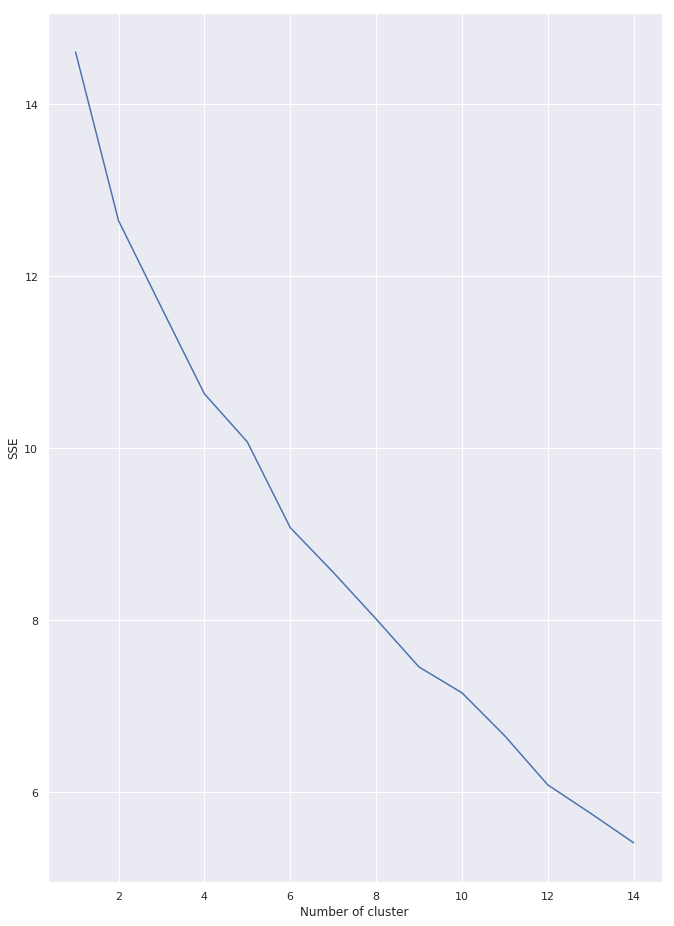

In [49]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, I would consider chose optimal value for the cluster as 5, as there is not really L-bow turn.

In [50]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [51]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [52]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [53]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     3
1    20
2    11
3    23
4     5
Name: Neighborhood, dtype: int64

In [54]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=128)

### Chronological sequence of most common venues across Neighborhoods

In [55]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [56]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,1
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,2


In [57]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [58]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [59]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [60]:
map_clusters

In [61]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [62]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [63]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [64]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [65]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [66]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     2
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
     ..
32    0
33    0
34    0
35    1
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    1
48    0
49    0
50    1
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [68]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [69]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [70]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [71]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [72]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


In [73]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [74]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Hebbal']

In [75]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,199,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,Domino's Pizza,13.035000,77.597000,Pizza Place
1,200,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,CityPearl SuperMarket,13.035203,77.595675,Department Store
2,201,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,CCD Express,13.034863,77.597633,Coffee Shop
3,202,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,kabab studio - coraltree,13.034889,77.597477,Indian Restaurant
4,203,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,Hindustan mess,13.034869,77.597626,Indian Restaurant
5,204,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,BDA PARK,13.035112,77.594224,Park
6,205,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Department Store,Venue Category_Park,Venue Category_Electronics Store,Venue Category_Flea Market,...,0.0,0.0,3,Northern,13.0358,77.597,City Pearl,13.035154,77.594198,Market


In [76]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [77]:
target_cluster

3

In [78]:
print("The target cluster is : ",target_cluster)

The target cluster is :  3


In [79]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant


In [80]:
print("There are {} neighborhoods which has similar characteristics to Hebbal.".format(possible_neighborhoods.shape[0]))

There are 269 neighborhoods which has similar characteristics to Hebbal.


In [81]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
2,2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
4,4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,...,0.0,0.0,3,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant


In [88]:
possible_neighborhoods.rename(columns={"Neighborhood": 'Neighborhoods'},inplace=True)

In [85]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [86]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,AverageIncome_x,Normalized_income_x,NumberOfVegRestaurants_x,NumberOfNonVeganrestaurants_x,Population_y,Normalized_population_y,AverageIncome_y,Normalized_income_y,NumberOfVegRestaurants_y,NumberOfNonVeganrestaurants_y
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,29378.716626,0.454466,0,1.0,138760,0.141072,29378.716626,0.454466,0,1.0


In [242]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Mathikere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Auto Garage,Venue Category_Shop & Service,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,...,13.032571,77.566126,Sandwich Place,757626,0.770247,61046.854723,0.944348,0,1.0,0.815645
1,Mathikere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Auto Garage,Venue Category_Shop & Service,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,...,13.034208,77.560674,Indian Restaurant,757626,0.770247,61046.854723,0.944348,0,1.0,0.815645
2,Mathikere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Auto Garage,Venue Category_Shop & Service,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,...,13.034556,77.560999,Ice Cream Shop,757626,0.770247,61046.854723,0.944348,0,1.0,0.815645
3,Mathikere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Auto Garage,Venue Category_Shop & Service,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,...,13.037194,77.565820,Department Store,757626,0.770247,61046.854723,0.944348,0,1.0,0.815645
4,Mathikere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Ice Cream Shop,Venue Category_Pizza Place,Venue Category_Auto Garage,Venue Category_Shop & Service,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,...,13.036968,77.565985,Indian Restaurant,757626,0.770247,61046.854723,0.944348,0,1.0,0.815645


In [243]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [244]:
top3_df = pd.DataFrame(top3).reset_index()

In [245]:
top3_df.head(10)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,[0.32959888840700646]
1,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Hookah Bar,Venue Category_Restaurant,[0.6589806874118266]
2,Bellandur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,[0.24491290943915342]
3,Bommasandra,Venue Category_Indian Restaurant,Venue Category_Women's Store,Venue Category_Food Court,[0.6018587777729211]
4,CV Raman Nagar,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Park,[0.4565632537994482]
5,Cantonment area,Venue Category_Indian Restaurant,Venue Category_Seafood Restaurant,Venue Category_Bookstore,[0.6429726634818888]
6,Domlur,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Pizza Place,[0.7855119911765059]
7,Gottigere,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Women's Store,[0.4335297505147968]
8,Hebbal,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Coffee Shop,[0.7824870224965725]
9,Hoodi,Venue Category_Indian Restaurant,Venue Category_Women's Store,Venue Category_Food Court,[0.39026982024788326]
